In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
 # Here I have iported all the libraries i need to develop the neural network

In [2]:
data = pd.read_csv('nn_dataset.csv') #read the dataset through panda
X = data[['X1', 'X2']].values  # here taking the X1 and X2 as input feature and taking input as an array
Y = pd.get_dummies(data['Y']).values # extracting Y as output feature and convert it binary representation by get_dummies as there was 5 classes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # spliting the dataset for training and testing with the ratio of 80:20 precent


In [3]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2  #initialized two neurons for input layer
        hiddenLayer1Neurons = 60  #initialized 60 neurons for hidden layer 1
        hiddenLayer2Neurons = 30  #initialized 30 neurons for hidden layer 2
        hiddenLayer3Neurons = 30  #initialized 30 neurons for hidden layer 3
        outLayerNeurons = 5       #initialized 5 neurons for output layer
        
        self.learning_rate = 0.1
        
        # set the weighted matrix for each layer randomly
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)  # set the weighted matrix for input layer and hidden layer1 randomly between the number of inputlayer neurons and hidden layer 1 neurons
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons) # set the weighted matrix for hiddden layer1 and hidden layer2 randomly between the number of hidden layer1 neurons and hidden layer 2 neurons
        self.W_H3H2 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons) # set the weighted matrix for hiddden layer2 and hidden layer3 randomly between the number of hidden layer2 neurons and hidden layer 3 neurons
        self.W_OH3 = np.random.randn(hiddenLayer3Neurons, outLayerNeurons) # set the weighted matrix for hiddden layer3 and output layer randomly between the number of output layer neurons
        
    def sigmoid(self, x, der=False): # initialized sigmoid function as activation function which shapes the values between 0 and 1 and used for classification 
        if der:
            return x * (1-x)
        return 1 / (1 + np.exp(-x))
    
        
    def feedForward(self, X): # this function is declared for forword propagation in the network
        
        # Calculate input and output for first hidden layer
        self.hidden1_input = np.dot(X, self.W_H1I) #dot product between the input values and weighted matrix 1
        self.hidden1_output = self.sigmoid(self.hidden1_input) #applying activation
        
        # Calculate input and output for second hidden layer
        self.hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) #dot product between the hidden layer 1 output and weighted matrix 2
        self.hidden2_output = self.sigmoid(self.hidden2_input) #applying activation
        
        # Calculate input and output for first hidden layer
        self.hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) #dot product between the hidden layer 2 output and weighted matrix 3
        self.hidden3_output = self.sigmoid(self.hidden3_input)
        
        # Calculate the final
        output_input = np.dot(self.hidden3_output, self.W_OH3) #dot product between the hidden layer 3 output and weighted matrix 4
        pred = self.sigmoid(output_input) #final prediction
        return pred
        
    def backPropagation(self, X, Y, pred): # back propagation
        m = 400 # number of dataset for training images
        
        # Calculate error and delta for output layer
        output_error = (pred - Y)/m  # error as derivative
        output_delta = output_error #delta for output layer
        
        # Backpropagation error of hidden layer 3
        hidden3_error = np.dot(output_delta, self.W_OH3.T) # Error value from next layer
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, der=True) # Apply derivative
        
         # Backpropagate error to second hidden layer
        hidden2_error = np.dot(hidden3_delta, self.W_H3H2.T) # Error value from next layer
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der=True) # Apply derivative
        
        # Backpropagate error to first hidden layer
        hidden1_error = np.dot(hidden2_delta, self.W_H2H1.T) # Error value from next layer
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der=True) # Apply derivative
        
        
        self.W_H1I -= self.learning_rate * np.dot(X.T, hidden1_delta) # Update weights between input and first hidden layer using gradient discent 
        self.W_H2H1 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_delta) # Update weights between first and second hidden layers using gradient discent 
        self.W_H3H2 -= self.learning_rate * np.dot(self.hidden2_output.T, hidden3_delta)  # Update weights between second and third hidden layers using gradient discent 
        self.W_OH3 -= self.learning_rate * np.dot(self.hidden3_output.T, output_delta) # Update weights between third hidden layer and output layer using gradient discent 
     
    def train(self, X, Y, epochs=500):
        error = [] # list for keeping tracks of the errors
        
        # loop for training
        for i in range(epochs):
            
            output = self.feedForward(X) #forword propagation
            self.backPropagation(X, Y, output) #back propagation
            error.append(np.mean(np.square(Y - output))) ## Calculate and store mean squared error
            
        
        # Plot training error
        plt.plot(error)
        plt.title('Training error')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.show()

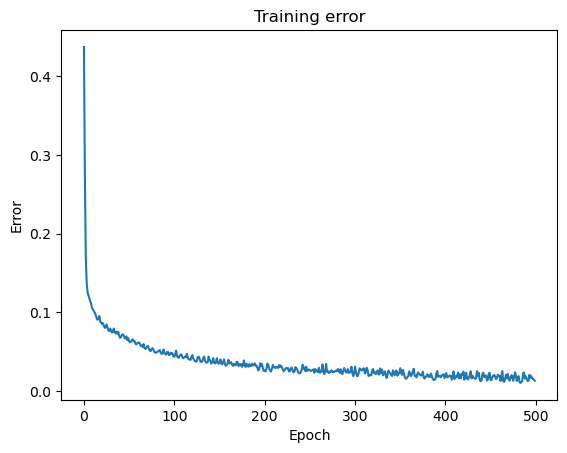

In [4]:

NN = NeuralNetwork() #creating an instance for the NeuralNetwork class
NN.train(X_train, Y_train) #train the network on training data

In [5]:
# Calls the feedForward() function of the trained neural network (NN) then pass the training data through the network then returns a prediction 
train_pred = NN.feedForward(X_train)

# Calculate training accuracy by comparing predictions with true labels
train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(Y_train, axis=1))
print(f"Train Accuracy: {train_accuracy:.2f}")


Train Accuracy: 0.94


In [6]:
print("Predictions:")
print("-------------------")
for x in X[:30]:  # First 30 samples
    
    # Reshape input to match networks expected input format
    x_reshaped = x.reshape(1, -1)
    probabilities = NN.feedForward(x_reshaped)
    
    # Get class probabilities from neural network (0-4)
    predicted_class = np.argmax(probabilities)
    
    print(f"{x[0]} -- {x[1]} -- {predicted_class}")

Predictions:
-------------------
91 -- 15 -- 4
64 -- 73 -- 0
78 -- 95 -- 0
39 -- 17 -- 2
62 -- 47 -- 1
91 -- 16 -- 4
43 -- 51 -- 0
90 -- 42 -- 2
94 -- 20 -- 4
45 -- 67 -- 0
69 -- 5 -- 4
77 -- 66 -- 1
46 -- 83 -- 0
60 -- 75 -- 0
92 -- 48 -- 2
55 -- 78 -- 0
43 -- 11 -- 4
89 -- 53 -- 1
65 -- 68 -- 0
69 -- 54 -- 1
42 -- 99 -- 0
47 -- 18 -- 2
55 -- 46 -- 1
48 -- 59 -- 0
71 -- 68 -- 1
89 -- 71 -- 1
86 -- 95 -- 0
44 -- 62 -- 0
80 -- 51 -- 1
94 -- 43 -- 2


In [7]:
#same as for train data calls the feed forword function from NeuralNetwork class and pass the 100 test data and compute the accuracy comparing the actual values and predicted values
test_pred = NN.feedForward(X_test)
test_accuracy = np.mean(np.argmax(test_pred, axis=1) == np.argmax(Y_test, axis=1))
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.97


In [8]:
#here i have printed 10 prediction res
print("Test Result:")
print("X1\tX2\tY")
print("-----------------")
for i in range(10):
    x1, x2 = X_test[i]
    pred_class = np.argmax(test_pred[i])
    print(f"{x1}\t{x2}\t{pred_class}")

Test Result:
X1	X2	Y
-----------------
81	48	1
46	98	0
46	39	1
86	8	4
60	12	4
81	73	1
80	74	1
44	62	0
90	74	1
39	17	2


In [9]:
print(NN.feedForward([42,3]))

[0.020345   0.00381562 0.01644663 0.05053963 0.94065248]
